# Restaraunt Yorumlarının Pozitif, Negatif ve Nötr analiz lerinin yapılması ve Modellenmesi

<img src='original_Bacchanal-Buffet-at-Caesars-Palace.jpg'>

<img src='Ekran görüntüsü 2023-11-01 122708.jpg'>

In [20]:
!pip install nltk

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmaları
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



gb=GradientBoostingClassifier()
d=DecisionTreeClassifier()
g=GaussianNB()
b=BernoulliNB()
lr=LogisticRegression()
r=RandomForestClassifier()
nb=MultinomialNB()


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word

from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud

#Dil tespit etmek için
from langdetect import detect

import seaborn as sns
import numpy as np
import scipy as sp

import nltk
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('restaurant.csv')

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.shape

(10417, 10)

In [5]:
df['text']=df['text'].str.lower() #kucuk harfe cevir'
df['text']=df['text'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir 
df['text']=df['text'].str.replace('\d+','') # rakamlari yoket
df['text']=df['text'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [6]:
df.stars.value_counts().sort_values(ascending=False)

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

## Sentiment analysis

In [7]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

#ekleri kaldırıp kökleri bulan fonksiyon

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [9]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

#Github / Şeyda hanımdan den alındı

In [10]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive


In [11]:
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

#Github/ mduruer den alındı

In [12]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,language
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive,en
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive,en
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive,en
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative,en
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive,en


In [13]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
sentiment      0
language       0
dtype: int64

In [14]:
df["language"].value_counts

<bound method IndexOpsMixin.value_counts of 0        en
1        en
2        en
3        en
4        en
         ..
10412    en
10413    en
10414    en
10415    en
10416    en
Name: language, Length: 10417, dtype: object>

In [17]:
df["language"].unique()

array(['en', 'zh-cn', 'de', 'ko', 'ja', 'fr', 'zh-tw', 'da', 'es', 'pt',
       'sk'], dtype=object)

<Axes: xlabel='language', ylabel='count'>

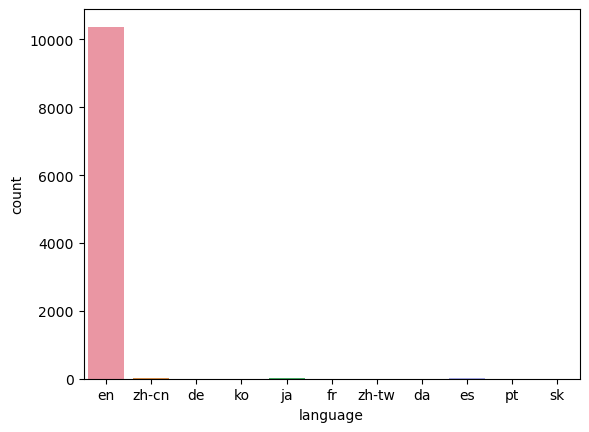

In [18]:
sns.countplot(x=df["language"])

In [19]:
df.language.value_counts().sort_values(ascending=False)

en       10375
es          10
zh-cn        7
ja           7
ko           5
de           4
fr           4
da           2
zh-tw        1
pt           1
sk           1
Name: language, dtype: int64

In [21]:
# Lang Detect
from langdetect import detect
df['language']=df['text'].apply(detect)
df=df[df['language']=='en']
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,language
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive,en
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive,en
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive,en
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative,en
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive,en
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,positive,en
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,positive,en
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,positive,en
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,positive,en


In [22]:
df.language.value_counts().sort_values(ascending=False)

en    10374
Name: language, dtype: int64

In [23]:
# Sadece İngilizce Olanları Alıoruz.
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [25]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
#Tokenize Cümledeki kelimeleri ayırmak ve Python listesi haline getirmek

In [27]:
df=df[['stars','text','sentiment']]

In [28]:
df

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
...,...,...,...
10369,5,best buffet ever irma was great served us bett...,positive
10370,4,hollllllyyyy moleyyyy this buffet was one for ...,positive
10371,5,the selection is amazing and all the food is e...,positive
10372,4,one of the best buffets ive had in vegas my on...,positive


In [29]:
df.stars.value_counts().sort_values(ascending=False)

5    4227
4    2626
3    1557
1    1051
2     913
Name: stars, dtype: int64

In [32]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    
#kelime bulutu yapma kodu

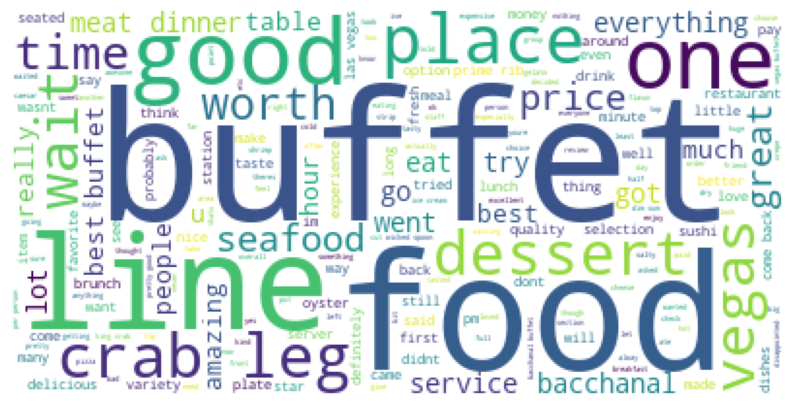

In [33]:
wc(df['text'],'white')

In [34]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

In [35]:
df.sentiment.value_counts().sort_values(ascending=False)

positive    6853
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [38]:
negative_data

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets when i r...
29       so i come here on my birthday thinking its the...
33       be careful using the restroom here while i was...
42       what a money pit food was terrible and not lab...
                               ...                        
10347    i  have eaten here for the breakfast and lunch...
10351    in thanksgiving day i stayed in line for three...
10358    i went to the wicked spoon at cosmopolitan and...
10359    i am one disappointed buffetloving foodie we f...
10367    came him from la thanksgiving week we decided ...
Name: text, Length: 1964, dtype: object

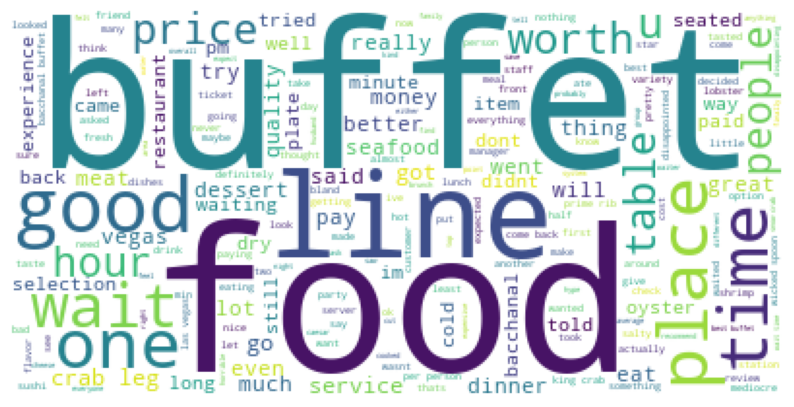

In [36]:
wc(negative_data,'white')

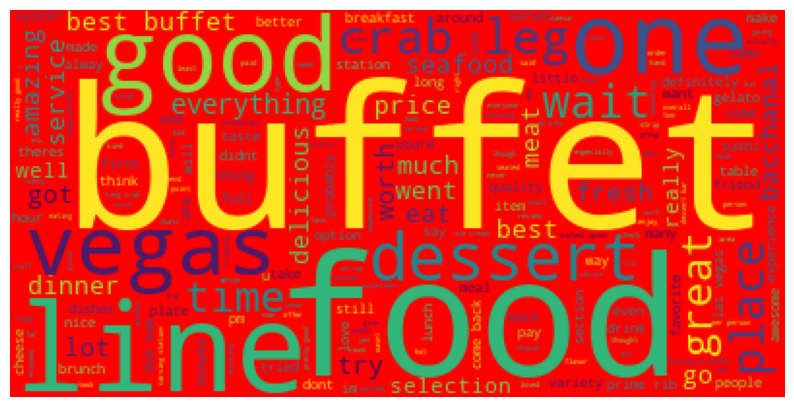

In [41]:
wc(positive_data,'red')

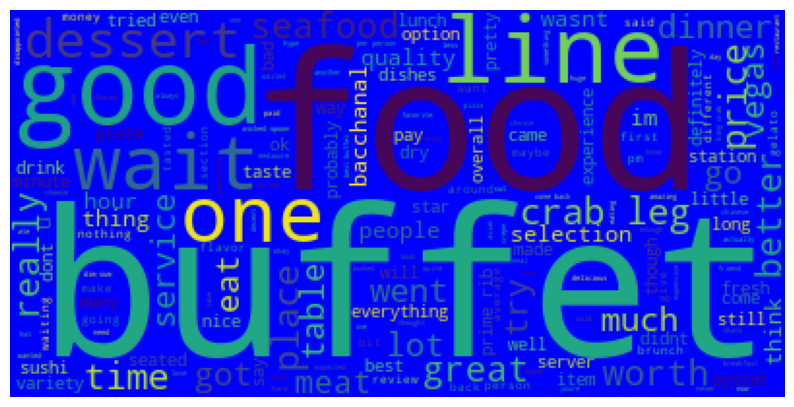

In [42]:
wc(neutral_data,'blue')

In [43]:
iyivekotu=df[(df['stars']==5)| (df['stars']==1)]

#|  işareti or demek - & and demek

#1 ve 5 yıldız verenleri alan kod

In [44]:
iyivekotu.head(10)
#index aradan çıkanlardan dolayı bozulmuş oldu

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
5,5,really enjoyed everything they had to offer it...,positive
8,5,lots of choices good service line wasnt as lon...,positive
10,5,best buffet as of march beats wicked spoon an...,positive
11,5,we tried bacchanal for lunch on a wednesday in...,positive
12,1,food is fine better than most buffets when i r...,negative
13,5,amazing buffet went at ish on a thursday and b...,positive
14,5,if this is what heaven is like then im going t...,positive


In [84]:
iyivekotu

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,1,not worth it too salty food and expensive this...,negative
2,5,i would give this infinite stars if i could my...,positive
3,5,really enjoyed everything they had to offer it...,positive
4,5,lots of choices good service line wasnt as lon...,positive
...,...,...,...
5273,5,we went to bacchanal on easter sunday as it wa...,positive
5274,1,came him from la thanksgiving week we decided ...,negative
5275,5,every time we visit las vegas we go to this bu...,positive
5276,5,best buffet ever irma was great served us bett...,positive


In [85]:
df.to_csv("iyivekotu.csv",index=False)

In [45]:
iyivekotu.reset_index(drop=True,inplace=True)

#index i tekrar reset yapıp sıralayan kod

In [46]:
iyivekotu.text[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

<Axes: xlabel='stars', ylabel='count'>

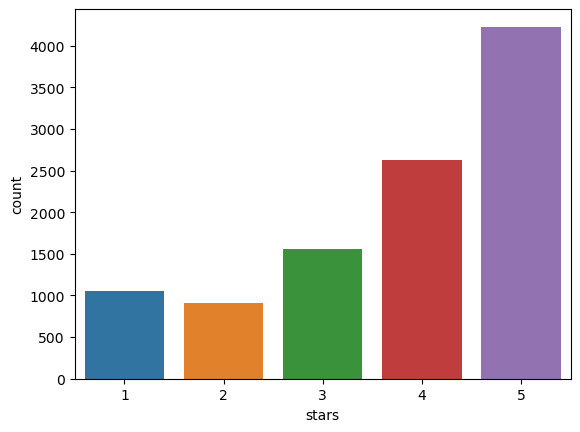

In [47]:
sns.countplot(x=df["stars"])

<Axes: xlabel='stars', ylabel='count'>

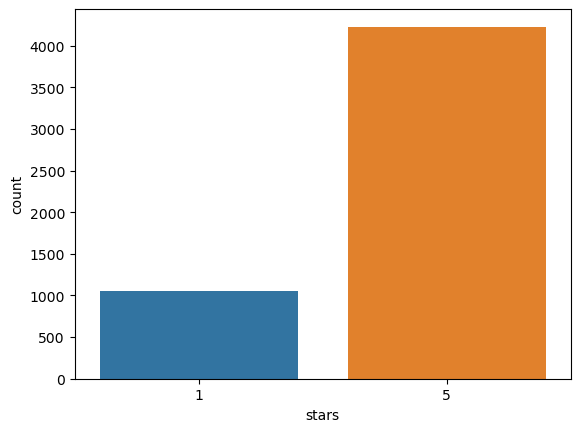

In [48]:
sns.countplot(x=iyivekotu["stars"])

In [49]:
x=iyivekotu["text"]
y=iyivekotu["stars"]

In [50]:
x[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [51]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [52]:
x=vect.fit_transform(x)
#Vektörize edince Tokenize da etmiş oluyoruz

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [54]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [55]:
nb=MultinomialNB()

In [56]:
model=nb.fit(x_train,y_train)

In [57]:
pred=nb.predict(x_test)

In [58]:
accuracy_score(pred,y_test)

0.9384469696969697

In [59]:
lr=LogisticRegression()

In [60]:
model=lr.fit(x_train,y_train)

In [61]:
pred=lr.predict(x_test)

In [62]:
accuracy_score(pred,y_test)

0.9422348484848485

In [63]:
b=BernoulliNB()

In [64]:
model=b.fit(x_train,y_train)

In [65]:
pred=b.predict(x_test)

In [66]:
accuracy_score(pred,y_test)

0.7992424242424242

In [67]:
r=RandomForestClassifier()

In [68]:
model=r.fit(x_train,y_train)

In [69]:
pred=r.predict(x_test)

In [70]:
accuracy_score(pred,y_test)

0.8598484848484849

In [71]:
d=DecisionTreeClassifier()

In [72]:
model=d.fit(x_train,y_train)

In [73]:
pred=d.predict(x_test)

In [74]:
accuracy_score(pred,y_test)

0.8797348484848485

In [75]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.67      0.73      0.70       201
           5       0.93      0.92      0.92       855

    accuracy                           0.88      1056
   macro avg       0.80      0.82      0.81      1056
weighted avg       0.88      0.88      0.88      1056



In [76]:
lr.fit(x_train,y_train)

LogisticRegression()

In [77]:
pred=lr.predict(x_test)

In [78]:
accuracy_score(pred,y_test)

0.9422348484848485

# yeni bir yorum geldiğinde  %94 oranında yapılan  yorumları anlayabiliyoruz ama %6 kötü yorumlar kaçmış olacak

In [79]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [80]:
df

,stars,text,sentiment,polarity,subjectivity
0,5,after getting food poisoning at the palms hote...,positive,0.337330,0.586926
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive,0.219409,0.537292
2,4,the crab legs are better than the ones at wick...,positive,-0.134722,0.731944
3,1,not worth it too salty food and expensive this...,negative,-0.325000,0.400000
4,5,i would give this infinite stars if i could my...,positive,0.362500,0.725000
...,...,...,...,...,...
10369,5,best buffet ever irma was great served us bett...,positive,0.543750,0.481250
10370,4,hollllllyyyy moleyyyy this buffet was one for ...,positive,0.210101,0.586869
10371,5,the selection is amazing and all the food is e...,positive,0.480000,0.630000
10372,4,one of the best buffets ive had in vegas my on...,positive,0.185185,0.533333


In [81]:
df.sentiment.value_counts()

positive    6853
negative    1964
neutral     1557
Name: sentiment, dtype: int64

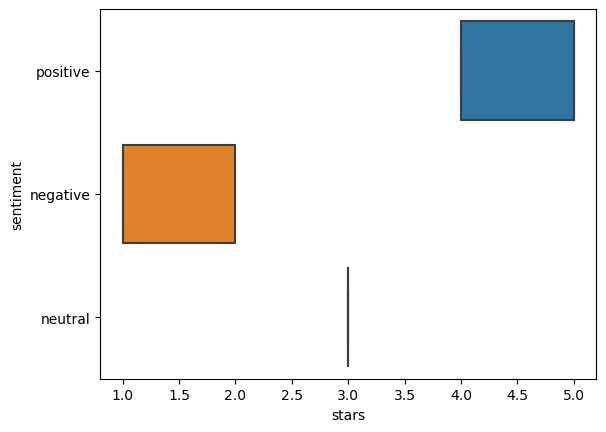

In [82]:
sns.boxplot(y='sentiment',x='stars',data=df);

In [92]:
from wordcloud import WordCloud
#paketimizi tanımlıyoruz
from wordcloud import STOPWORDS
#en çok tekrar eden kelimeleri kaldırmak için
from PIL import Image
import numpy as np
#bu pil RESİMLERİ okuyor

In [97]:
import matplotlib.pyplot as plt

In [115]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor).generate(' '.join(data))
    plt.figure( figsize=(15,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [116]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

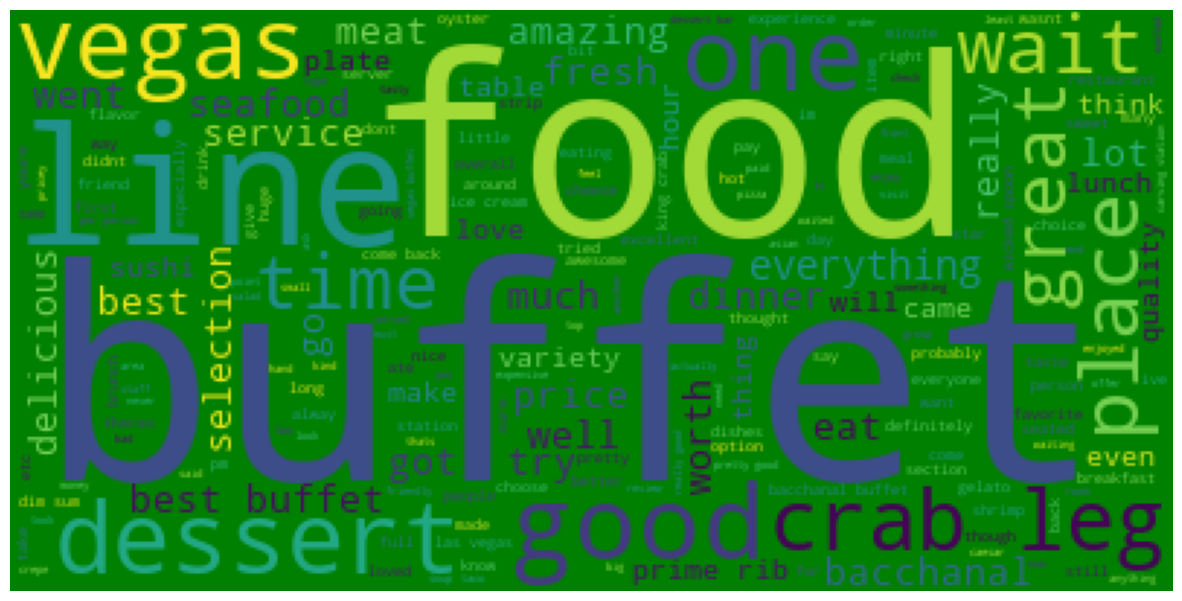

In [117]:
wc(positive_data,'green')

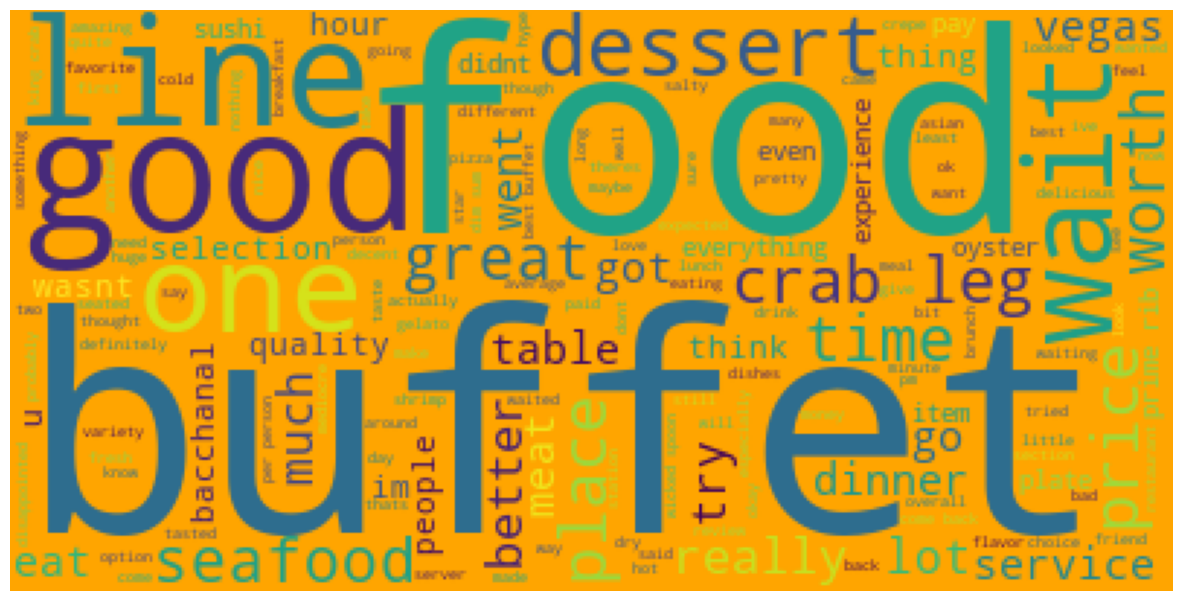

In [118]:
wc(neutral_data,'orange')

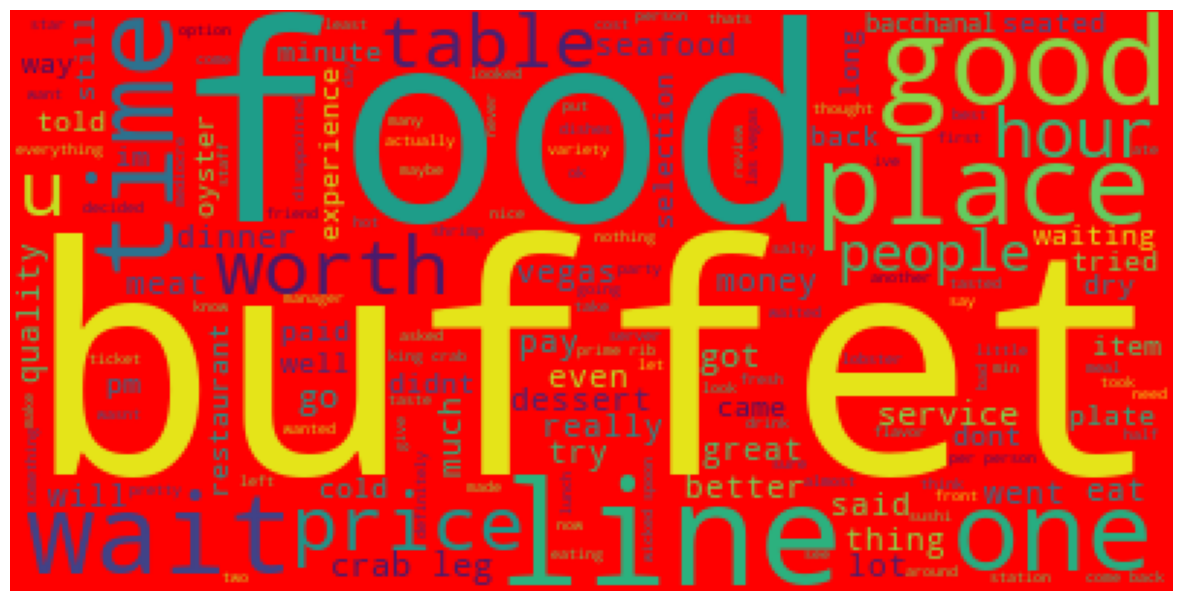

In [119]:
wc(negative_data,'red')